In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
import random
from queue import Queue

In [2]:
bolt_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\bolt-clean.tif")[:,:,0]

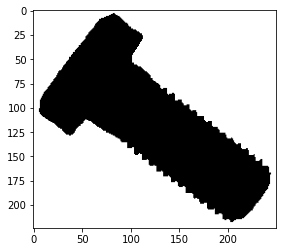

In [3]:
plt.imshow(bolt_img, cmap="gray")
plt.show()

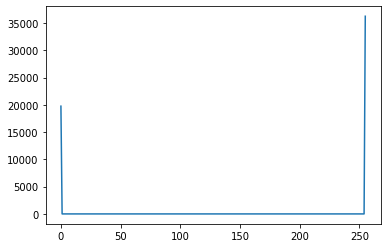

In [4]:
hist_bolt = cv2.calcHist([bolt_img], [0], None, [256], [0, 256])
plt.plot(hist_bolt)
plt.show()

In [5]:
np.where((bolt_img > 0) & (bolt_img < 255))

(array([], dtype=int64), array([], dtype=int64))

In [6]:
bolt_img.shape

(224, 250)

So, we can conclude that this image has only 0 and 255.

In [7]:
def floodfill(img):
    result = np.zeros_like(img)
    label_img = np.zeros_like(img)
    label_value = 2
    move_direction = ((-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1))
    (height, width) = img.shape
    for h in range(height):
        for w in range(width):
            if img[h,w]==0 and result[h,w]==0:
                q = Queue()
                q.put((h,w))
                result[h, w] = 255
                label_img[h, w] = label_value
                while q.empty() == False:
                    (h_l,w_l) = q.get_nowait()
                    for move in move_direction:
                        h_s = h_l + move[0]
                        w_s = w_l + move[1]
                        if img[h_s, w_s]==0 and result[h_s, w_s]==0 and h_s>=0 and h_s<height and w_s>=0 and w_s<width:
                            q.put((h_s, w_s))
                            result[h_s, w_s] = 255
                            label_img[h_s, w_s] = label_value
                label_value += 1
    return result, label_img


In [8]:
def fill_color(label_img):
    color_dict = {}
    (height, width) = label_img.shape
    labelled_img = np.zeros((height, width, 3))
    for h in range(height):
        for w in range(width):
            if label_img[h, w] != 0:
                val = label_img[h, w]
                if str(val) not in color_dict:
                    r_c = random.randint(0, 255)
                    g_c = random.randint(0, 255)
                    b_c = random.randint(0, 255)
                    color_dict[str(val)] = (r_c, g_c, b_c)
                (r_c, g_c, b_c) = color_dict[str(val)]
                labelled_img[h, w, 0] = r_c
                labelled_img[h, w, 1] = g_c
                labelled_img[h, w, 2] = b_c
    return labelled_img

In [9]:
detected_bolt, labels_bolt = floodfill(bolt_img)

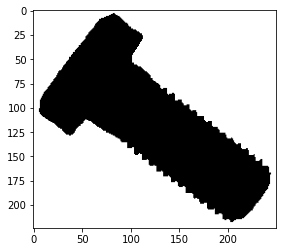

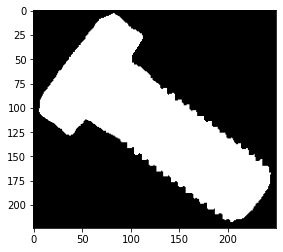

In [10]:
plt.imshow(bolt_img, cmap="gray")
plt.show()
plt.imshow(detected_bolt, cmap="gray")
plt.show()

In [11]:
bolt_labelled = fill_color(labels_bolt).astype(int)

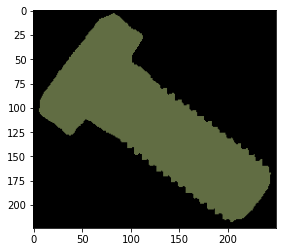

In [12]:
plt.imshow(bolt_labelled)
plt.show()

(836, 1212)


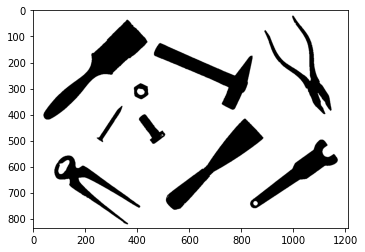

In [13]:
many_img = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch10\all-tools-small.tif")[:,:,0]
print(many_img.shape)
plt.imshow(many_img, cmap="gray")
plt.show()

In [14]:
detected_many, label_many = floodfill(many_img)

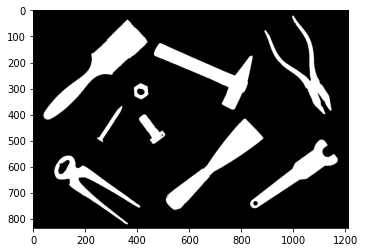

In [15]:
plt.imshow(detected_many, cmap="gray")
plt.show()

In [16]:
many_labelled = fill_color(label_many).astype(int)

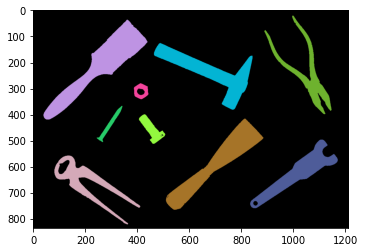

In [17]:
plt.imshow(many_labelled)
plt.show()